# Brief Explanation about This Dataset
***
**Dataset Explanation** <br>

Label: <br>
1. Positif (tone berita): -1,0,1
2. Persuasif : 0,1
3. produk/perusahaan: 0,1
4. Subjektif: 0,1

**Methods Explanation** <br>
Beberapa algoritma yang sudah diterapkan pada dataset ini, yaitu: <br>
1. Deep Learning <br>
2. Text Summarization: <br>
  - Text Rank-BERT-CNN
  - Text Rank-BERT-BiLSTM
  - Text Rank-RoBERTa-CNN
  - Text Rank-RoBERTa-BiLSTM
  - LSA-BERT-CNN
  - LSA-BERT-BiLSTM
  - LSA-RoBERTa-CNN
  - LSA-RoBERTa-BiLSTM
3. Level Paragraf (variatif persuasif) <br>
  - BERT-CNN
  - BERT-BiLSTM
  - BERT-SVM
  - BERT-RF
  - RoBERTa-CNN
  - RoBERTa-BiLSTM
  - RoBERTa-SVM
  - RoBERTa-RF
  - GloVe-CNN
  - GloVe-BiLSTM
  - GloVe-SVM
  - GloVe-RF
  - FastText-CNN
  - FastText-BiLSTM
  - FastText-SVM
  - FastText-RF


##Install Library

In [1]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
!pip install transformers
from keras.preprocessing import sequence
import numpy as np
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.3

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 32.3 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153892 sha256=4790f6f5f2f586b4410e71cce7b79beee165aad9561f0f726ce0550c7c8f4deb
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=dc6ee6cb65948cbc3d7e8a9ec131a199ba7eb86a1ada1be077e5f084c80352b8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.4
    Uninstalling pytest-7.4.4:
      Successfully u

### Import Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from re import search
import numpy as np
from wordcloud import WordCloud, STOPWORDS

##Initiate Data

In [3]:
from io import BytesIO

import requests
import pandas as pd

#Native Ads
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1kMwuQFljg_7jW1to7tMeoH-CA5u39GvK0H4bECPvup8&output=xlsx')
data = r.content
data_ads = pd.read_excel(data, 'All', dtype=str, index_col=None)

In [4]:
#Berita Murni
s = requests.get('https://docs.google.com/spreadsheet/ccc?key=1ZBE741REdARLa7pq72_VkdJWndqU2EkTkwsYiBClTqQ&output=xlsx')
berita = s.content
data_news = pd.read_excel(berita, 'Copy of 1-370', dtype=str, index_col=None)

In [5]:
print('Native Ads: ',len(data_ads))
print('Berita Murni: ',len(data_news))

Native Ads:  1410
Berita Murni:  1100


In [6]:
data_ads

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,NaN,1,1,1,1
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,NaN,NaN,NaN,NaN,NaN
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,NaN,NaN,NaN,NaN,NaN
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,NaN,NaN,NaN,NaN,NaN
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,1156,https://otomotif.tempo.co/read/1590205/cara-me...,"Cara Merawat Rem Cakram Motor, Pemotor Wajib Tahu",3. Pastikan Kaliper Dalam Kondisi Baik. Kalipe...,0,0,0,0,native ads,NaN,NaN,NaN,NaN,NaN
1406,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Honda resmi memperkenalkan model terbaru mobil...,0,0,1,0,native ads,NaN,NaN,NaN,NaN,NaN
1407,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Honda ZRV dibekali grille berbentuk segi delap...,0,0,1,0,native ads,NaN,NaN,NaN,NaN,NaN
1408,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Lampu belakang HondaZRV adalah LED berbentuk r...,0,0,1,0,native ads,NaN,NaN,NaN,NaN,NaN


In [7]:
data_news

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Pemerintahan Kota Jakarta Selatan mengalokasik...,1,0,0,1,berita murni,NaN,NaN,NaN,NaN
1,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Adapun kegiatan pembinaan untuk mencegah tawur...,1,0,0,1,berita murni,NaN,NaN,NaN,NaN
2,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Adapun tawuran menjadi perhatian Pemkot Jaksel...,1,0,0,1,berita murni,NaN,NaN,NaN,NaN
3,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Penyidik Kepolisian Resor (Polres) Metro Jakar...,1,0,0,1,berita murni,NaN,NaN,NaN,NaN
4,2,https://megapolitan.kompas.com/read/2022/07/01...,"Polisi Musnahkan 32,5 Kg Sabu dan 5 Kg Ganja H...","Polres Metro Jakarta Pusat memusnahkan 37,5 ki...",1,0,0,1,berita murni,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni,NaN,NaN,NaN,NaN
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,NaN,NaN,NaN,NaN
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,NaN,NaN,NaN,NaN
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,NaN,NaN,NaN,NaN


## Cleaning Data

In [8]:
drop_kolom_ads = ['Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
data_ads = data_ads.drop(drop_kolom_ads, axis=1)
data_ads = data_ads.dropna(axis=0)
data_ads

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads
...,...,...,...,...,...,...,...,...,...
1405,1156,https://otomotif.tempo.co/read/1590205/cara-me...,"Cara Merawat Rem Cakram Motor, Pemotor Wajib Tahu",3. Pastikan Kaliper Dalam Kondisi Baik. Kalipe...,0,0,0,0,native ads
1406,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Honda resmi memperkenalkan model terbaru mobil...,0,0,1,0,native ads
1407,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Honda ZRV dibekali grille berbentuk segi delap...,0,0,1,0,native ads
1408,1159,https://otomotif.tempo.co/read/1590047/honda-z...,"Honda ZR-V Meluncur di Cina, Simak Tampilan da...",Lampu belakang HondaZRV adalah LED berbentuk r...,0,0,1,0,native ads


In [9]:
drop_kolom = ['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 9']
data_news = data_news.drop(drop_kolom, axis=1)
data_news = data_news.dropna(axis=0)
data_news

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita
0,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Pemerintahan Kota Jakarta Selatan mengalokasik...,1,0,0,1,berita murni
1,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Adapun kegiatan pembinaan untuk mencegah tawur...,1,0,0,1,berita murni
2,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Adapun tawuran menjadi perhatian Pemkot Jaksel...,1,0,0,1,berita murni
3,1,https://megapolitan.kompas.com/read/2022/07/01...,"Cegah Tawuran, Pemkot Jaksel Siapkan Anggaran ...",Penyidik Kepolisian Resor (Polres) Metro Jakar...,1,0,0,1,berita murni
4,2,https://megapolitan.kompas.com/read/2022/07/01...,"Polisi Musnahkan 32,5 Kg Sabu dan 5 Kg Ganja H...","Polres Metro Jakarta Pusat memusnahkan 37,5 ki...",1,0,0,1,berita murni
...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni


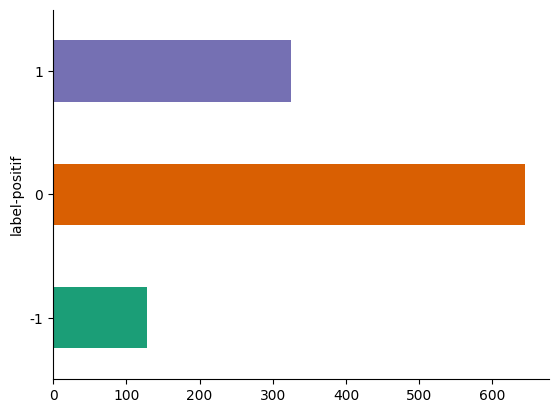

In [10]:
# @title label-positif

from matplotlib import pyplot as plt
import seaborn as sns
data_news.groupby('label-positif').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
data_ads.isna().sum()

id-berita               0
url                     0
judul                   0
content per paragraf    0
label-positif           0
label-persuasif         0
label-produk            0
perspektif-tunggal      0
label-berita            0
dtype: int64

In [12]:
data_news.isna().sum()

id-berita               0
url                     0
judul                   0
content per paragraf    0
label-positif           0
label-persuasif         0
label-produk            0
perspektif-tunggal      0
label-berita            0
dtype: int64

## Check Data Proportion

In [13]:
# Hitung jumlah sampel untuk setiap label
labels = ['label-positif', 'label-persuasif', 'produk/perusahaan', 'label-subjektif']


### Label Positif

In [14]:
data_ads['label-positif'].value_counts()

label-positif
1     985
0     384
-1     37
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Positif Native Ads')

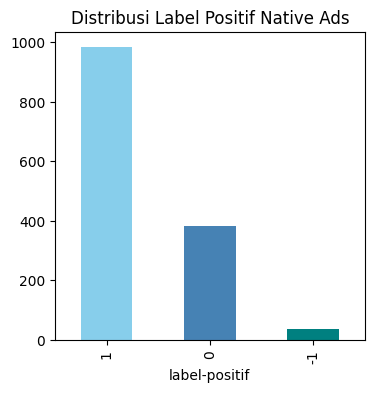

In [15]:
plt.figure(figsize=(4,4))
data_ads['label-positif'].value_counts().plot(kind='bar',color=['skyblue','steelblue','teal'])
plt.title('Distribusi Label Positif Native Ads')

In [16]:
data_news['label-positif'].value_counts()

label-positif
0     645
1     325
-1    128
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Positif Berita Murni')

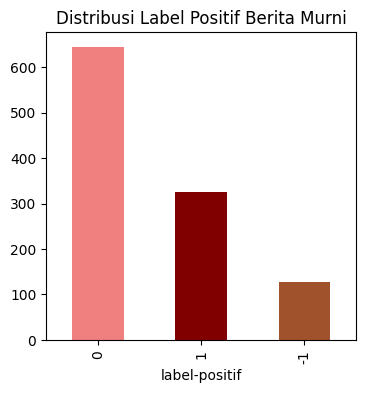

In [17]:
plt.figure(figsize=(4,4))
data_news['label-positif'].value_counts().plot(kind='bar', color=['lightcoral','maroon', 'sienna'])
plt.title('Distribusi Label Positif Berita Murni')

### Label Persuasif

In [18]:
data_ads['label-persuasif'].value_counts()

label-persuasif
1    993
0    413
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Persuasif Native Ads')

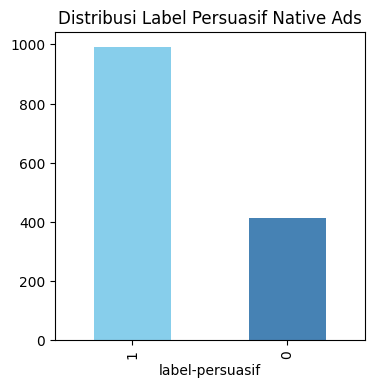

In [19]:
plt.figure(figsize=(4,4))
data_ads['label-persuasif'].value_counts().plot(kind='bar',color=['skyblue','steelblue'])
plt.title('Distribusi Label Persuasif Native Ads')

In [20]:
data_news['label-persuasif'].value_counts()

label-persuasif
0    1009
1      89
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Persuasif Berita Murni')

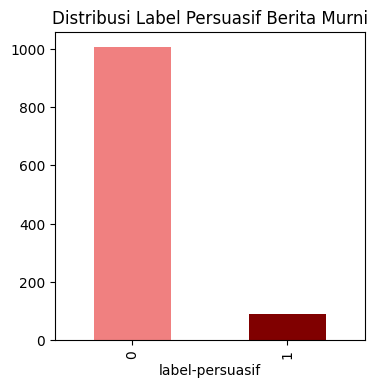

In [21]:
plt.figure(figsize=(4,4))
data_news['label-persuasif'].value_counts().plot(kind='bar', color=['lightcoral','maroon'])
plt.title('Distribusi Label Persuasif Berita Murni')

### Label Produk

In [22]:
data_ads['label-produk'].value_counts()

label-produk
1    1150
0     256
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Produk Native Ads')

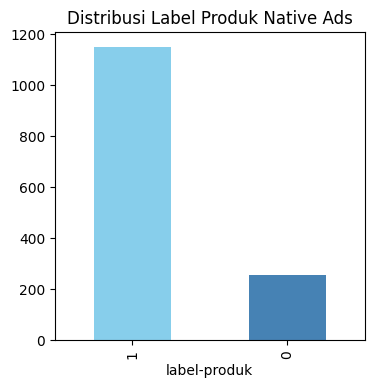

In [23]:
plt.figure(figsize=(4,4))
data_ads['label-produk'].value_counts().plot(kind='bar',color=['skyblue','steelblue','teal'])
plt.title('Distribusi Label Produk Native Ads')

In [24]:
data_news['label-produk'].value_counts()

label-produk
0    1023
1      75
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Produk Berita Murni')

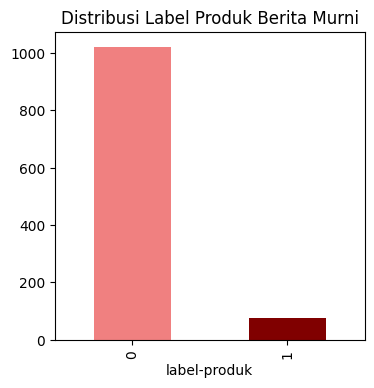

In [25]:
plt.figure(figsize=(4,4))
data_news['label-produk'].value_counts().plot(kind='bar', color=['lightcoral','maroon', 'sienna'])
plt.title('Distribusi Label Produk Berita Murni')

### Label Subjektif

In [26]:
data_ads['perspektif-tunggal'].value_counts()

perspektif-tunggal
1    1002
0     404
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Subjektif Native Ads')

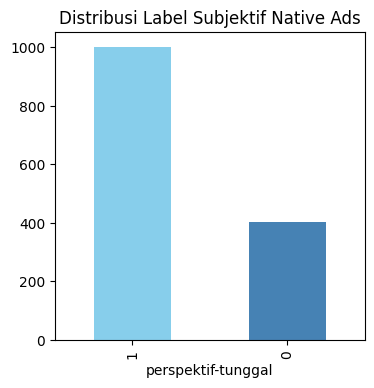

In [27]:
plt.figure(figsize=(4,4))
data_ads['perspektif-tunggal'].value_counts().plot(kind='bar',color=['skyblue','steelblue'])
plt.title('Distribusi Label Subjektif Native Ads')

In [28]:
data_news['perspektif-tunggal'].value_counts()

perspektif-tunggal
0    715
1    383
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Subjektif Berita Murni')

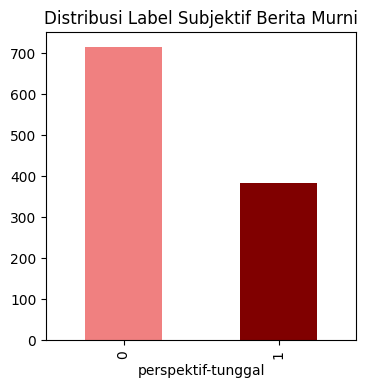

In [29]:
plt.figure(figsize=(4,4))
data_news['perspektif-tunggal'].value_counts().plot(kind='bar', color=['lightcoral','maroon'])
plt.title('Distribusi Label Subjektif Berita Murni')

## Menggabungkan dataframe


In [30]:
dataset = pd.concat([data_ads, data_news])
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads
...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2504 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id-berita             2504 non-null   object
 1   url                   2504 non-null   object
 2   judul                 2504 non-null   object
 3   content per paragraf  2504 non-null   object
 4   label-positif         2504 non-null   object
 5   label-persuasif       2504 non-null   object
 6   label-produk          2504 non-null   object
 7   perspektif-tunggal    2504 non-null   object
 8   label-berita          2504 non-null   object
dtypes: object(9)
memory usage: 195.6+ KB


In [32]:
dataset['label-positif'] = pd.to_numeric(dataset['label-positif'])
dataset['label-persuasif'] = pd.to_numeric(dataset['label-persuasif'])
dataset['label-produk'] = pd.to_numeric(dataset['label-produk'])
dataset['perspektif-tunggal'] = pd.to_numeric(dataset['perspektif-tunggal'])

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2504 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id-berita             2504 non-null   object
 1   url                   2504 non-null   object
 2   judul                 2504 non-null   object
 3   content per paragraf  2504 non-null   object
 4   label-positif         2504 non-null   int64 
 5   label-persuasif       2504 non-null   int64 
 6   label-produk          2504 non-null   int64 
 7   perspektif-tunggal    2504 non-null   int64 
 8   label-berita          2504 non-null   object
dtypes: int64(4), object(5)
memory usage: 195.6+ KB


### Label Positif

In [34]:
dataset['label-positif'].value_counts()

label-positif
 1    1310
 0    1029
-1     165
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Positif')

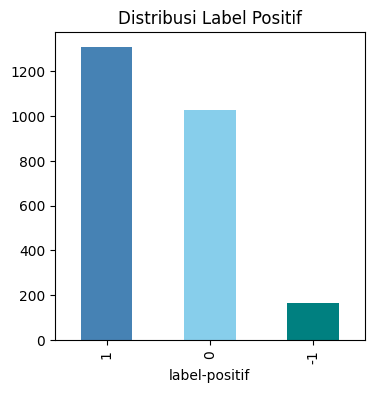

In [35]:
plt.figure(figsize=(4,4))
dataset['label-positif'].value_counts().plot(kind='bar',color=['steelblue','skyblue','teal'])
plt.title('Distribusi Label Positif')

### Label Persuasif

In [36]:
dataset['label-persuasif'].value_counts()

label-persuasif
0    1422
1    1082
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Persuasif')

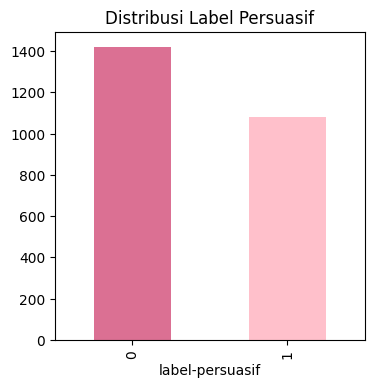

In [37]:
plt.figure(figsize=(4,4))
dataset['label-persuasif'].value_counts().plot(kind='bar',color=['palevioletred','pink'])
plt.title('Distribusi Label Persuasif')

### Label Produk

In [38]:
dataset['label-produk'].value_counts()

label-produk
0    1279
1    1225
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Produk')

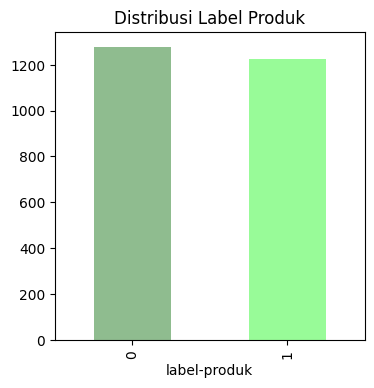

In [39]:
plt.figure(figsize=(4,4))
dataset['label-produk'].value_counts().plot(kind='bar',color=['darkseagreen','palegreen'])
plt.title('Distribusi Label Produk')

### Label Subjektif

In [40]:
dataset['perspektif-tunggal'].value_counts()

perspektif-tunggal
1    1385
0    1119
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Subjektif')

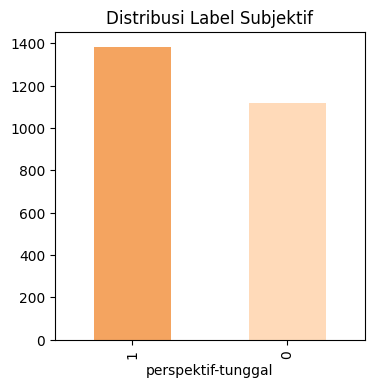

In [41]:
plt.figure(figsize=(4,4))
dataset['perspektif-tunggal'].value_counts().plot(kind='bar',color=['sandybrown','peachpuff'])
plt.title('Distribusi Label Subjektif')

#Encode Label

In [42]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['labels'] = labelencoder.fit_transform(dataset['label-berita'])
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1
...,...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni,0
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0


## Save Data

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /All Dataset/Gabungan (3).csv', index=False)

# Preprocessing

## Lower case

In [45]:
dataset['content_lower'] = dataset['content per paragraf'].str.lower()
dataset.head()

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen..."


## Remove punctuation

In [46]:
import re
def rem_number(sentence):
  sentence=str(sentence)
  rem_num = re.sub('[0-9]+', '', sentence)
  return rem_num

In [47]:
dataset['content_punct'] = dataset['content_lower'].str.replace(r'[^\w\s]+', '')
dataset['content_punct'] = dataset['content_punct'].apply(rem_number)
dataset.head()

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen..."


## Lemmatization

In [48]:
def convert_list_to_string(sentence):
  str1 = ' '.join(sentence)
  return str1

In [49]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()
dataset['content_lemma'] = dataset['content_punct'].apply(lambda x: [lemmatizer.lemmatize(x)])
dataset['content_lemma'] = dataset['content_lemma'].apply(convert_list_to_string)
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekalig...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai politik m...,taibbi juga sebut jumlah partai politik milik ...


## Stopwords

In [50]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
words = stopwords.words("indonesian")
dataset['content_token'] = dataset['content_lemma'].apply(lambda x: [item for item in x.split() if item not in words])
dataset['content_stopwords']= dataset['content_token'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"[absen, online, rambah, usaha, ganti, absen, m...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"[manfaat, absen, online, usaha, mari, ajar, er...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"[data, hrd, tanggung, gaji, karyawan, data, hr...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"[karyawan, laku, absen, tulis, jam, hadir, tan...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"[absen, online, rupa, sistem, absensi, manfaat...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekalig...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekalig...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"[donald, trump, lawan, biden, tahana, coba, se...",donald trump lawan biden tahana coba serang bi...
1096,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"[utas, taibbi, baca, cuplik, buah, serial, das...",utas taibbi baca cuplik buah serial dasar ribu...
1097,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"[taibbi, twitter, pelan, halang, halang, alat,...",taibbi twitter pelan halang halang alat kontro...
1098,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai poli

## Save Data

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /All Dataset/Prepocessed (3).csv', index=False)

## Mencari num_words terbaik

In [53]:
from collections import Counter

# Gabungkan semua teks menjadi satu string besar
all_text = ' '.join(dataset['content_lemma'])

# Hitung frekuensi kata
word_freq = Counter(all_text.split())

# Urutkan kata berdasarkan frekuensi (dari yang paling sering hingga yang paling jarang)
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Lihat 10 kata teratas untuk mendapatkan ide
print(word_freq_sorted[:10])

[('yang', 5154), ('dan', 4370), ('di', 3619), ('dengan', 2744), ('untuk', 2479), ('ini', 1984), ('dari', 1615), ('dalam', 1394), ('itu', 1262), ('juga', 1252)]


## Menentukan max_len terbaik
dengan Percentile

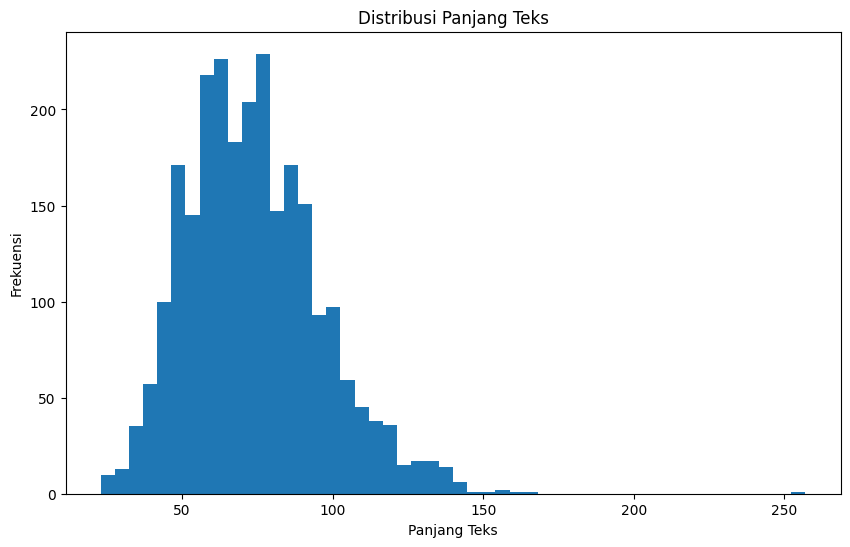

In [54]:
import matplotlib.pyplot as plt

# Hitung panjang teks untuk setiap dokumen
text_lengths = dataset['content_lemma'].apply(lambda x: len(x.split()))

# Visualisasikan distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()

In [55]:
# Menemukan nilai max_len berdasarkan persentil
max_len = np.percentile(text_lengths, 95)
max_len

114.0

## Word Cloud

### Native Ads

In [56]:
berita_ads = ''
stopwords = set(STOPWORDS)

# # Filter DataFrame untuk hanya mendapatkan baris dengan 'label-berita' == 1
# filtered_data = data_ads['label-berita'] == 1

#Iterate seluruh file csv
for i in dataset['label-berita']:
  if i == 'native ads':
    for val in dataset['content per paragraf']:
      if val:
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

        # Join the tokens back into a string and append it to berita_ads
        berita_ads += " ".join(filtered_tokens)+" "
  break

In [57]:
len(berita_ads)

1356730

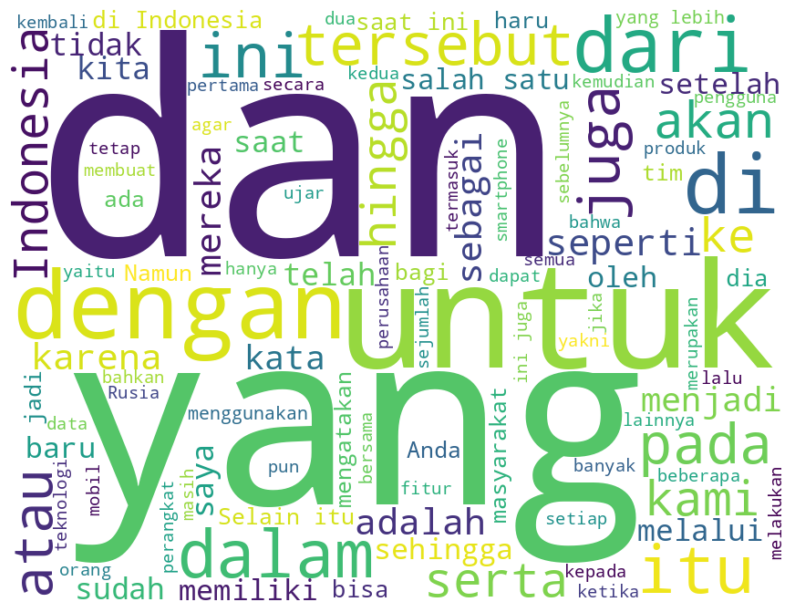

In [58]:
plt.figure(figsize = (10, 8)) # Text that is not Fake
text = dataset.content_stopwords
# Create and generate a word cloud image:
wc = WordCloud(max_words = 100, width = 850, height = 650,
               background_color = "white",
               stopwords = stopwords,
               min_font_size = 10)
wc.generate(berita_ads)

# Display the generated image:
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Berita Murni

In [59]:
berita_murni = ''
stopw = set(STOPWORDS)

# # Filter DataFrame untuk hanya mendapatkan baris dengan 'label-berita' == 0
# filtered_data = data_ads['label-berita'] == 0

#Iterate seluruh file csv
for i in dataset['label-berita']:
  if i == 'berita murni':
    for val in dataset['content per paragraf']:
      if val:
        # typecaste each val to string
        val = str(val)
        # split the value
        tokens = val.split()
        filtered_tokens = [token for token in tokens if token.lower() not in stopw]

        # Join the tokens back into a string and append it to berita_ads
        berita_murni += " ".join(filtered_tokens)+" "
  break